### Challenge 01 : Crear una visualización Python con los datos del Titanic

##### Ejemplo: Tenemos la base de datos del Titanic y queremos descubrir cuantas mujeres sobrevivieron en el Titanic y ver la distribucion de estas mujeres por Pclass


In [1]:
# Importando classes para usar métodos
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
# Importando nuestra data base: 
df = pd.read_csv("data/train.csv") 
# Quitando los registros que tienen errores
df = df.dropna()

In [19]:
# Miramos que tiene la data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [20]:
# Ahora sabemos que hay diferentes columnas como PassengerId, Survived, Pclass etc. 

# 1. Saber cuantas mujeres han sobrevivido al Titanic 

# 1.1 Dividimos nuestra base de datos filtrando por todos los que han sobrevivido
df_survived =  df.loc[df['Survived']== 1]

# 1.2 Separamos a las mujeres

df_survived_female = df_survived.loc[df['Sex']== 'female']

# Nos Aseguramos que solo hay mujeres en este pedazo de la data.
df_survived_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S


##### Respondemos a la preguntas:

In [13]:
# 1 cuantas mujeres sobrevivieron al Titanic.
df_survived_female.count()

PassengerId    82
Survived       82
Pclass         82
Name           82
Sex            82
Age            82
SibSp          82
Parch          82
Ticket         82
Fare           82
Cabin          82
Embarked       82
dtype: int64

###### Como vemos todas las columnas tienen 82 registros por lo que 82 mujeres sobrevivieron al Titanic

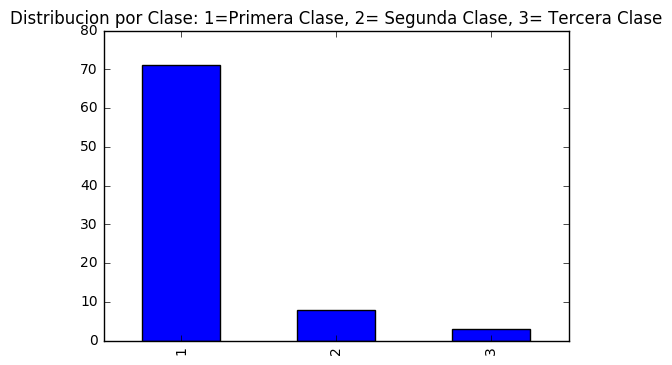

In [21]:
# Ahora queremos saber la distribución de estas mujeres sobrevivientes por clase. 

# Cuando queremos ver la distribución de algo con pocos variables la mejor forma es
# hacer una visualizacion y la palabra distribución nos indica que debemos hacer un barchart

# 1 Organizamos los datos por PClass - esta columna nos dice en qué clase estaban los pasajeros

df_survived_female.Pclass.value_counts().plot.bar();
plt.title("Distribucion por Clase: 1=Primera Clase, 2= Segunda Clase, 3= Tercera Clase")

#### Podemos decir que si vemos el diagrama, murieron mujeres de primera clase mas que de las tercera clase.

## Challenge para Martin

Utilizando la variable "df" y utilizando el código de arriba. Martin puedes decirnos cuántos hombres murieron (no sobrevivieron) en el titanic? También puedes mostrarnos con un "bar chart" la distribución de dónde embarcaron? (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
# En estos pedazos del documento puedes crear codigo